
# ***Transfer Learning Project in Python - January 2024***
_Practical application of the concepts taught in DIO's Machine Learning training._


```
Bootcamp Geração Tech Unimed-BH - Data Science
Project challenge - Module: Machine Learning
Training neural networks with Transfer Learning
Aluno: Nivaldo Beirão - njtsb1
Orientation: Teacher Dr. Diego Renan
```

## ***Introduction***

The project consists of applying the _Transfer Learning_ method in a _Deep Learning_ network in the Python language in the COLAB environment.  

For example, we will use the following project that performs Transfer Learning with the MNIST Dataset: 

https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb 

The dataset used encompasses two classes: cats and dogs. A description of the database can be viewed at this link:

https://www.tensorflow.org/datasets/catalog/cats_vs_dogs. 

The downloadable dataset can be accessed through this other link:

https://www.microsoft.com/en-us/download/details.aspx?id=54765. 

## ***Theoretical Reference***


_***Transfer Learning***_ is a machine learning (ML) research problem that focuses on storing knowledge gained from solving one problem and applying it to a different but related problem. For example, knowledge gained from learning to recognize cars can be applied when trying to recognize trucks. 

From a practical point of view, reusing or transferring information from previously learned tasks to learning new tasks has the potential to significantly improve the sampling efficiency of a reinforcement learning agent.

At one extreme, transfer learning can take the pre-trained network, freeze the weights, and use one of its hidden layers (usually the last one) as a feature extractor, using those features as input to a smaller neural network.

At the other extreme, we start with the pre-trained network but allow some of the weights (usually the last layer or layers) to be modified. 

Another name for this procedure is called "fine-tuning" because we are slightly adjusting the weights of the pre-trained network for the new task. 

We typically train this network with a lower learning rate, as we expect the features to already be relatively good and not need to be changed much.

## ***Objective***

Perform _transfer learning_ using a neural network in Python.

## ***Inputs***

***Dataset***

The dataset used encompasses two classes: 

- cats.
- dogs. 

A description of the database can be viewed at this [link](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs)

The downloadable dataset can be accessed through this other link:

[https://www.microsoft.com/en-us/download/details.aspx?id=54765](https://www.microsoft.com/en-us/download/details.aspx?id=54765).

***Reference project***

For example, we will use the following reference project that performs Transfer Learning with the MNIST Dataset: 
https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb 


## ***Development***


This project will consist of the following phases:

1. Importing libraries
2. Obtaining image database
3. Data preprocessing (VGG16)
4. Loading data
5. Randomization
6. Partitioning data into training, validation and test data
7. Visualization of trained data
8. Conv2d neural network construction
9. Model training setup
10. Starting Transfer Learning with an already trained network


### ***1. Importing libraries***

In [1]:
%matplotlib inline

import os
import random
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf

from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

### ***2. Obtaining the image database***

The first step will be to load our data. We will use the Kaggle database, available via the Microsoft link:

https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

As it is a compressed file, we will use the unzip command to decompress it.. 

In [ ]:
# Getting the file from the Microsoft repository
! wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-11-24 22:19:19--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.46.200.228, 2600:1408:10:1a5::317f, 2600:1408:10:198::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.46.200.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  90.1MB/s    in 10s     

2022-11-24 22:19:29 (78.3 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
# Viewing the unzipped file: kagglecatsanddogs_5340.zip
! ls -la

total 805612
drwxr-xr-x 1 root root      4096 Nov 24 22:20  .
drwxr-xr-x 1 root root      4096 Nov 24 22:18  ..
-rw-r--r-- 1 root root     24876 May  9  2022  CDLA-Permissive-2.0.pdf
drwxr-xr-x 4 root root      4096 Nov 22 00:13  .config
-rw-r--r-- 1 root root 824887076 May  9  2022  kagglecatsanddogs_5340.zip
drwxr-xr-x 4 root root      4096 Nov 24 22:19  PetImages
-rw-r--r-- 1 root root       104 Feb 10  2017 'readme[1].txt'
drwxr-xr-x 1 root root      4096 Nov 22 00:14  sample_data


In [ ]:
# Decompressing the file:
#! unzip kagglecatsanddogs_5340.zip

In [ ]:
# Viewing the folders and files created after unzipping: Folder of interest is PetImages
! ls -la

If the unzipping was successful, several files and some directories will be created, including the _PetImage_ folder, which will be our base folder. 

Inside this folder are the Cats and Dogs subfolders where our images in jpg format are located.

Now we can delete the downloaded ZIP file:

In [ ]:
!rm kagglecatsanddogs_5340.zip

Now let's reorganize our data in the same way as was used in the reference tutorial with all images organized into subfolders, one for each class.

In fact our PetImages folder is already categorized with the Cat and Dog subfolders, as we can confirm:

In [ ]:
!ls PetImages/

Cat  Dog


### ***2. Obtaining the image database***

The next cell should load our custom base correctly. To do so, we will replace the variable ```root``` with our base directory ```PetImage```. The idea is to create a 'list' where each element is a _dict_ where x is the data and y is the label (an integer). 

We will use the get_image(path) function to correctly load the image into the array.
Also note that the images are being resized to the size of 224x224. This transformation is necessary because the input to our VGG16 classifier is a 224x224 RGB image. 

This operation will be done by the code below:

In [ ]:
root = 'PetImages'

exclude = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']

train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]

categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['PetImages/Dog', 'PetImages/Cat']


### ***3. Data preprocessing***

Helper function for pre-processing data into an image and an input vector.

In [ ]:
# Helper function for pre-processing data into an image and an input vector.
def get_image(path):
    img = tf.keras.utils.load_img(path, target_size=(224, 224))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

### ***4. Data loading***

Loading images from the 'root' folder (PetImages)

In [ ]:
# In practice, it was necessary to reduce the number of images to not exceed Google Collab's RAM limit.
for i in range(201, 12500):
  os.remove(f'PetImages/Cat/{i}.jpg')
  os.remove(f'PetImages/Dog/{i}.jpg')

In [ ]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# Contagem do número de classes
num_classes = len(categories)

### ***5. Randomization***

Randomizing data with the random.shuffle function()

In [ ]:
random.shuffle(data)

### ***6. Partitioning data into training, validation and test data***

The division of data into these three categories - training, validation and testing - aims to evaluate the accuracy of our classifier (VGG16). During training, the optimizer uses the validation set to evaluate its internal performance and determine variation without overfitting to the data set used for training. The test set is always kept outside the training algorithm and is only used at the end to evaluate the final accuracy of our model.

Creating partitioning of data that will be used for training/validation and testing(70%, 15%, 15%):

In [ ]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

Separation of data and labels (x and y of each part of training, validation and testing data)

In [ ]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]


The following code ensures that other pre-processing of the data is done as before, making sure that the types are float32 and that they are normalized between 0 and 1. 

In [ ]:
# data normalization
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# converting labels into vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(61, 2)


Summarizing what we have accomplished so far, we have:


In [ ]:
# summary
print("Uploading %d images from %d categories"%(len(data), num_classes))
print("Data partitioning into Training / Validation / Test: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("Training data size: ", x_train.shape)
print("Workout label sizes: ", y_train.shape)


Uploading 402 images from 2 categories
Data partitioning in Training / Validation / Test: 281, 60, 61
Training data size: (281, 224, 224, 3)
Training labels size: (281, 2)


We see that the 402 images were uploaded and separated into two categories (Cat and Dog). Furthermore, they were separated into three data sets for ```training```, ```validation``` and ```testing```.

The format of the training data is of the type (n, 244, 244, 3) where n indicates the number of items in the training set. 244, 244 indicates the size of the images after pre-processing. 

The format of the labels is of the type (n, c) where c is the number of classes found (in this case only two categories: Cat and Dog).

### ***7. Data visualization***

The following code allows you to check some images from our dataset:

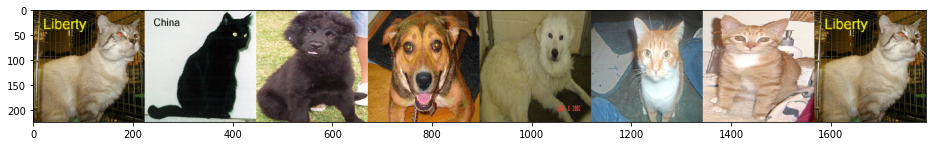

In [ ]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [tf.keras.utils.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

### ***8. Convolutional neural network construction (CNN)***

The network we will build contains 4 alternating layers of convolution and ***max-pooling***, followed by a ***dropout*** after each alternating conv/pooling pair. After the last ***pooling layer***, we will attach a ***fully connected layer*** with 256 neurons, another ***dropout*** layer, and finally a ***softmax* classification layer ** for our classes.

The loss function used will be categorical cross-entropy, and our learning algorithm will be ***AdaDelta***. Several things about this network can be changed to get better performance, perhaps using a larger network or a different optimizer would help, but for the purposes of this notebook the goal is just to get an understanding of a rough baseline for comparison purposes and then no need to spend a lot of time trying to optimize this network.

The following code builds the proposed network with the various layers involved:

In [ ]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                   

### ***9. Model training configuration***

The network created is considered a medium-sized network with approximately 1.2 million weights and trends. 

The next step consists of training the model for 100 epochs or periods with a batch of 128. History recording was performed so that it is possible to plot the loss as a function of time.

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))


Epoch 1/10
3/3 [==============================] - 20s 6s/step - loss: 0.7612 - accuracy: 0.4413 - val_loss: 0.6925 - val_accuracy: 0.5500
Epoch 2/10
3/3 [==============================] - 19s 5s/step - loss: 0.6991 - accuracy: 0.4840 - val_loss: 0.6926 - val_accuracy: 0.5500
Epoch 3/10
3/3 [==============================] - 18s 5s/step - loss: 0.6945 - accuracy: 0.4840 - val_loss: 0.6927 - val_accuracy: 0.5500
Epoch 4/10
3/3 [==============================] - 18s 5s/step - loss: 0.6933 - accuracy: 0.4982 - val_loss: 0.6935 - val_accuracy: 0.4667
Epoch 5/10
3/3 [==============================] - 18s 5s/step - loss: 0.6922 - accuracy: 0.5765 - val_loss: 0.6948 - val_accuracy: 0.4500
Epoch 6/10
3/3 [==============================] - 18s 5s/step - loss: 0.6901 - accuracy: 0.5302 - val_loss: 0.6982 - val_accuracy: 0.4500
Epoch 7/10
3/3 [==============================] - 21s 5s/step - loss: 0.6855 - accuracy: 0.5231 - val_loss: 0.7041 - val_accuracy: 0.4500
Epoch 8/10
3/3 [==================

Plotting loss validation and accuracy validation as a function of time:

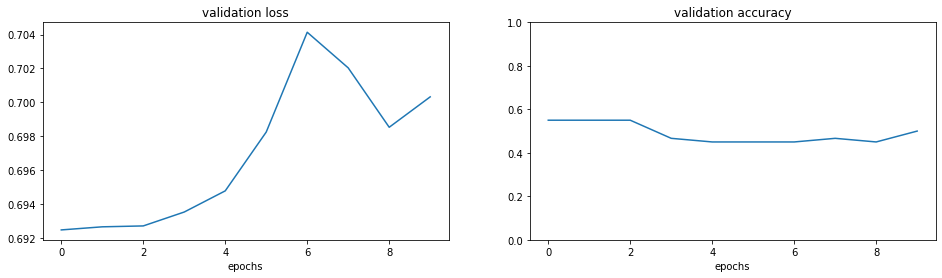

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

It is observed that the validation loss starts to increase after 16 epochs, while the accuracy remains stable between 40% and 50%.

A final evaluation was done by running the model on a training set. In this case, the results obtained were:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.7017521858215332
Test accuracy: 0.39344263076782227


Due to the limitations of the machine where the activities proposed here were carried out (Python 3 Google Compute Engine, 12GB RAM Disk: 107GB free tier plan) the results are very modest with an accuracy of less than 40%. Remembering that the size of the dataset was reduced to around 240 images.

### ***10. Starting Transfer Learning with an already trained network***

Let's start Transfer Learning by submitting our small dataset to an already trained network. VGG16 from the keras package was used, which was trained on ImageNet. Once the network is operational, you can inspect the layers with the summary() method.

In [ ]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

Note that this network is much larger than the previously constructed network. It contains 13 convolutional layers and two fully connected layers at the end. It has more than 138 million parameters (100 times more parameters). 

In [ ]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history2 = model_new.fit(x_train, y_train, 
                         batch_size=128, 
                         epochs=10, 
                         validation_data=(x_val, y_val))


Epoch 1/10
3/3 [==============================] - 182s 57s/step - loss: 1.2324 - accuracy: 0.4662 - val_loss: 0.8618 - val_accuracy: 0.4500
Epoch 2/10
3/3 [==============================] - 175s 54s/step - loss: 0.8077 - accuracy: 0.4591 - val_loss: 0.7694 - val_accuracy: 0.5500
Epoch 3/10
3/3 [==============================] - 178s 55s/step - loss: 0.7156 - accuracy: 0.5801 - val_loss: 0.8485 - val_accuracy: 0.4500
Epoch 4/10
3/3 [==============================] - 179s 56s/step - loss: 0.7672 - accuracy: 0.5231 - val_loss: 0.7072 - val_accuracy: 0.4500
Epoch 5/10
3/3 [==============================] - 172s 54s/step - loss: 0.5901 - accuracy: 0.6335 - val_loss: 0.5689 - val_accuracy: 0.7000
Epoch 6/10
3/3 [==============================] - 173s 54s/step - loss: 0.6017 - accuracy: 0.6406 - val_loss: 0.5131 - val_accuracy: 0.7667
Epoch 7/10
3/3 [==============================] - 174s 54s/step - loss: 0.5173 - accuracy: 0.7402 - val_loss: 0.5806 - val_accuracy: 0.6167
Epoch 8/10
3/3 [====

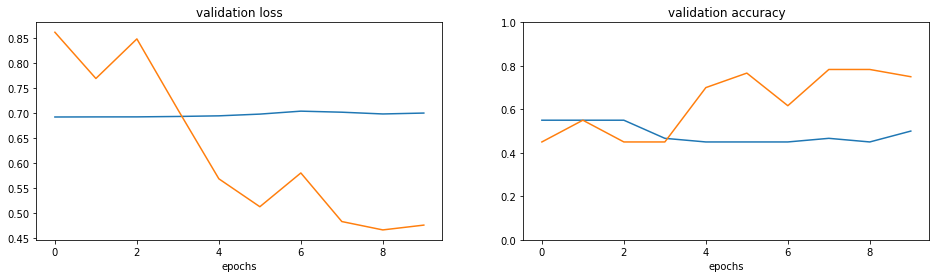

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.4613323509693146
Test accuracy: 0.9016393423080444


In [ ]:
img, x = get_image('PetImages/Cat/115.jpg')
probabilities = model_new.predict([x])


1/1 [==============================] - 1s 778ms/step


## **Conclusions**



Through loss and accuracy graphs, a significant improvement in the results achieved after transferring learning from a pre-trained network (VGG16) was proven. Limitations of the work developed can be attributed to the small number of samples possible to be used in the project.

### ***References***

[Transfer learning](https://en.wikipedia.org/wiki/Transfer_learning)

[Most used Deep Learning libraries in Python](https://insightlab.ufc.br/8-bibliotecas-de-deep-learning-mais-usadas-em-python)

[Transfer Learning applied to flower recognition](https://medium.com/ensina-ai/tutorial-transfer-learning-3972cac5e9b5)

[Reference tutorial](colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb)

[ADADELTA: An Adaptive Learning Rate Method](https://arxiv.org/abs/1212.5701)

[A Gentle Introduction to the Rectified Linear Unit (ReLU)](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

[Deep Learning: Image Recognition](https://lapix.ufsc.br/ensino/visao/visao-computacionaldeep-learning/deep-learningreconhecimento-de-imagens/#Assuntos_Gerais_Explanacoes)